In [ ]:
import brainless

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, date
from catboost import Pool
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


In [2]:
traindata = pd.read_csv("./train_users_2.csv")

In [3]:
traindata.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
traindata.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [5]:
traindata.describe(include="all")

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,3i36xonuux,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x1efbe770388>,
 [Text(-0.6374260040708731, 0.8964865249038824, 'NDF'),
  Text(0.3518560891101517, -1.0422078931557317, 'US'),
  Text(0.9801761174997744, -0.4992542224989875, 'other'),
  Text(1.0505551904277426, -0.3260886257834355, 'FR'),
  Text(1.0757003965157959, -0.2299318528080874, 'IT'),
  Text(1.0873919856100125, -0.16606826798372498, 'GB'),
  Text(1.0941487402849694, -0.11330725542883291, 'ES'),
  Text(1.0977763933177862, -0.06990701162396556, 'CA'),
  Text(1.0991996073579258, -0.04195501381458721, 'DE'),
  Text(1.0997487617093173, -0.0235087455816582, 'NL'),
  Text(1.0999531897874317, -0.010147919809208587, 'AU'),
  Text(1.0999971778597688, -0.0024917264184409994, 'PT')])

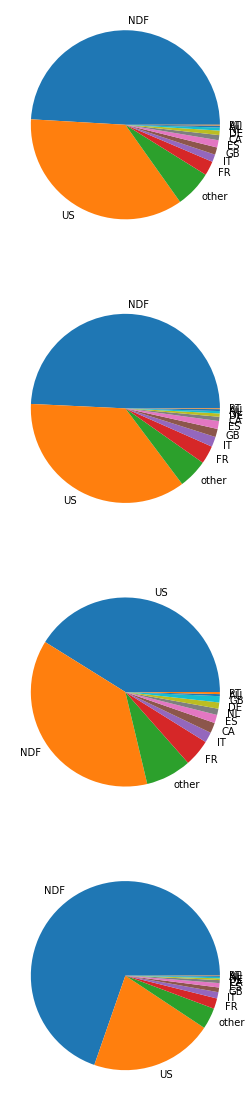

In [6]:

male = traindata[traindata.gender=="MALE"].country_destination.value_counts()
female = traindata[traindata.gender=="FEMALE"].country_destination.value_counts()
other = traindata[traindata.gender=="OTHER"].country_destination.value_counts()
unknown = traindata[traindata.gender=="-unknown-"].country_destination.value_counts()


fig,ax = plt.subplots(4)
# fig.
fig.set_figwidth(20)
fig.set_figheight(20)

ax[0].pie(male.values,labels=male.index,radius=1)
ax[1].pie(female.values,labels=female.index,radius=1)
ax[2].pie(other.values,labels=other.index,radius=1)
ax[3].pie(unknown.values,labels=unknown.index,radius=1)





In [7]:
traindata.iloc[2]

id                              4ft3gnwmtx
date_account_created            2010-09-28
timestamp_first_active      20090609231247
date_first_booking              2010-08-02
gender                              FEMALE
age                                     56
signup_method                        basic
signup_flow                              3
language                                en
affiliate_channel                   direct
affiliate_provider                  direct
first_affiliate_tracked          untracked
signup_app                             Web
first_device_type          Windows Desktop
first_browser                           IE
country_destination                     US
Name: 2, dtype: object

In [8]:
traindata.eq("-unknown-").sum()/len(traindata)

C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.000000
gender                     0.448290
age                        0.000000
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000000
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.127739
country_destination        0.000000
dtype: float64

In [9]:
traindata.eq(0).sum()/len(traindata)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.000000
gender                     0.000000
age                        0.000000
signup_method              0.000000
signup_flow                0.771788
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000000
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [10]:
traindata.signup_flow.value_counts(dropna=False)

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [11]:
traindata.isnull().sum()/len(traindata)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [12]:
traindata.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [13]:
traindata.first_device_type.value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [14]:
traindata.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

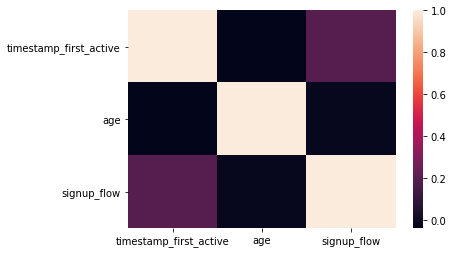

In [15]:
sns.heatmap(traindata.corr())

In [16]:
# type(pd.Series([2, 1, 3,np.NaN, 3], name='A').unique()[3])

In [17]:

# traindata.timestamp_first_active = traindata.timestamp_first_active.apply(ts_convert)
# traindata.head()

In [18]:
traindata.language.value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [19]:
traindata.first_affiliate_tracked.value_counts(dropna=False)

untracked        109232
linked            46287
omg               43982
tracked-other      6156
NaN                6065
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [20]:
traindata.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [18]:
def worknullvalues(X):
    X.first_affiliate_tracked = X.first_affiliate_tracked.fillna("notfound")
    return X

In [22]:
#datacleaning
datalabelencoders= {}
traindata = pd.read_csv("./train_users_2.csv")
y = traindata["country_destination"]
yencoder = LabelEncoder()
y =yencoder.fit_transform(y)
traindata.drop(["country_destination","id"],axis=1,inplace=True) 
traindata = worknullvalues(traindata)
catcolumns = []
catindecies  = []
for index,i in enumerate(traindata.columns):
    if len(traindata[i].unique()) <= 70:
        if  i == "signup_flow":
            catcolumns.append(i)
            catindecies.append(index)
            continue
        encoder = LabelEncoder()
        print(i)
        encoder.fit(traindata[i])
        catcolumns.append(i)
        datalabelencoders[i] = encoder
browser_values = pd.Series(datalabelencoders["first_browser"].transform(traindata["first_browser"])).value_counts()

def ts_convert (timestamp: int):
    # a function which changes timestamp into readable date format
    timestamp = timestamp // 1000000
    year = timestamp // 10000
    month = (timestamp % 10000) // 100
    day = timestamp % 100
    return date(year, month, day)

def getdatefromstring(st):
    year = int(st[:4])
    month = int(st[5:7])
    day = int(st[8:10])
    return date(year, month,day)
def datacleaning(data):
    timestamp_first_active = data.timestamp_first_active.apply(ts_convert)
    date_account_created = data.date_account_created.apply(getdatefromstring)
    data.drop(["date_first_booking","age","timestamp_first_active","date_account_created"],axis=1,inplace=True)
    for i in catcolumns:
        if i == "signup_flow":
            continue
        print(i)
        data[i] = datalabelencoders[i].transform(data[i])
        if i == "first_browser":
            for i in range(len(data.first_browser)):
                if browser_values[data.first_browser[i]] < 100 :
                    data.first_browser[i] = 50
                    
    
    data["year_first_active"] = timestamp_first_active.apply(lambda x: x.year)
    data["month_first_active"] = timestamp_first_active.apply(lambda x: x.month)
    data["year_account_created"] = date_account_created.apply(lambda x:x.year)
    data["month_account_created"] = date_account_created.apply(lambda x:x.month)
    return data 
    
    

gender
signup_method
language
affiliate_channel
affiliate_provider
first_affiliate_tracked
signup_app
first_device_type
first_browser


In [23]:
traindata = datacleaning(traindata)

gender
signup_method
language
affiliate_channel
affiliate_provider
first_affiliate_tracked
signup_app
first_device_type
first_browser


C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
xt

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year_first_active,month_first_active,year_account_created,month_account_created
118675,2,1,0,5,2,4,7,2,6,21,2013,10,2013,10
152049,0,0,24,5,2,4,7,1,8,29,2014,2,2014,2
137157,1,0,0,5,5,8,4,2,3,41,2014,1,2014,1
28701,1,1,0,5,3,2,6,2,3,17,2012,6,2012,6
126235,2,0,0,5,2,4,7,2,3,41,2013,11,2013,11
68763,1,1,0,5,2,4,7,2,3,41,2013,4,2013,4
130936,2,1,0,5,5,8,4,2,6,17,2013,12,2013,12
117276,0,0,0,5,2,4,0,2,3,41,2013,10,2013,10
91212,2,1,0,5,3,12,6,2,3,17,2013,7,2013,7
47339,1,0,0,5,2,4,7,2,3,8,2012,11,2012,11


In [13]:
(["signup_flow"]+catcolumns)

['signup_flow',
 'gender',
 'signup_method',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser']

In [10]:
xt,xp,yt,yp = train_test_split(traindata,y,shuffle=True)

In [15]:
type(xt)

pandas.core.frame.DataFrame

In [ ]:
cat = CatBoostClassifier(loss_function="MultiClass",eval_metric="Accuracy",task_type="GPU",iterations=10000,colsample_bylevel=0.5,learning_rate=0.03,max_depth=10) 
trpool = Pool(data=xt,label=yt,cat_features=catindecies)
vpool = Pool(data=xp,label=yp,cat_features=catindecies)
cat.fit(xt,yt, eval_set=vpool,cat_features=catindecies,verbose=500)

In [74]:
def unseenlabels(test):
    for i in  test[test.signup_method == "weibo"].signup_method.index:
        test.signup_method[i] = 'basic'
    for i in test[test.language == '-unknown-'].language.index:
        test.language[i] = 'en'
    for i in test.first_browser.index:
        if test.first_browser[i] not in datalabelencoders["first_browser"].classes_:
            test.first_browser[i] = 'Google Earth'
    return test

In [75]:
test = pd.read_csv("./test_users.csv")
test= unseenlabels(test)
ids = test.id
test.drop("id",axis=1, inplace=True)
len(test.first_browser.value_counts())
test = worknullvalues(test)
test= datacleaning(test)

C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

gender
signup_method
language
affiliate_channel
affiliate_provider
first_affiliate_tracked
signup_app
first_device_type
first_browser


C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [106]:
traindata.first_browser.value_counts()
# len(traindata)

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Crazy Brow

In [38]:
sessions = pd.read_csv("./sessions.csv")

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')

In [87]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [88]:
len(sessions.user_id.unique())

135484

In [44]:
len(sessions[sessions.user_id=="d1mm9tcy42"].action_detail)

127

In [15]:
sessions.describe(include="all")

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10488111,9441533,9441533,10567737,1.043171e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2768278,3560902,1776885,3594286,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.940581e+04
std,NaN,NaN,NaN,NaN,NaN,8.888424e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.147000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.444000e+03


In [16]:
sessions.isnull().sum()/len(sessions)

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [17]:
sessions.device_type.value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [41]:
agegenderbkts = pd.read_csv("./age_gender_bkts.csv")

In [43]:
len(agegenderbkts)

420

In [20]:
agegenderbkts.describe(include="all")

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,30-34,US,female,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [21]:
# traindata = pd.merge(traindata,sessions ,left_on=["id"],right_on=["user_id"],how="left")

In [22]:
# traindata.describe(include="all")

In [23]:
# traindata[traindata.id=="0hjoc5q8nf"]
